In [ ]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
filename = 'Sigmoid.csv'
urllib.request.urlretrieve(url, filename)
Data = pd.read_csv(url)

Data

,x,y
0,-3.186022,-0.126490
1,0.392737,3.396318
2,-4.817696,-0.032391
3,-1.577942,0.069783
4,-8.935573,0.017409
5,-0.592758,0.727137
6,4.934335,4.475377
7,-7.722024,0.024865
8,5.616402,4.506522
9,-5.407019,0.011716


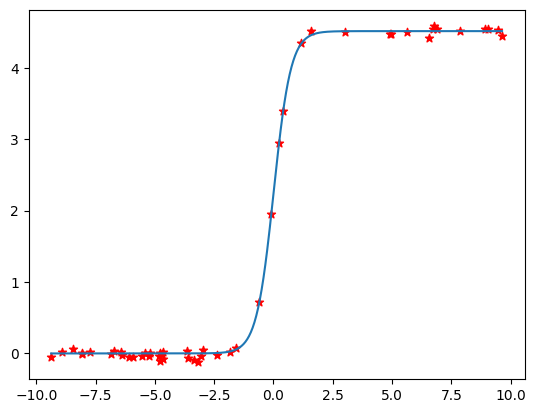

In [74]:
X = np.float64(Data.x)
Y = np.float64(Data.y)



def M(x,θ):
  return (θ[0])/((θ[1]) + np.exp((-θ[2])*(x))) 



def funcion_costo(θ, N):

  sigma = 0

  for i in range(N):
    sigma += (((Y[i] - (M(X[i],θ))/1)) **2)

  return sigma


def gradiente(X,Y,θ_0, θ_1, θ_2):
  grad = np.zeros(3)
  for i in range(len(X)):
    grad[0] += 2*(θ_0 / (θ_1 + np.exp((-θ_2) * X[i])) - Y[i]) / (θ_1 + np.exp((-θ_2) * X[i]))
    grad[1] += 2*(θ_0 / (θ_1 + np.exp(-θ_2 * X[i])) - Y[i]) * θ_0 *np.exp(-θ_2 * X[i]) / (θ_1 + np.exp(-θ_2 * X[i]))**2
    grad[2] += 2*(θ_0 / (θ_1 + np.exp(-θ_2 * X[i])) - Y[i]) * θ_0 * X[i] *np.exp(-θ_2 * X[i]) / (θ_1 + np.exp(-θ_2 * X[i]))**2
    
  return grad


def descenso(X, Y , γ , itmax , e, θ_0, θ_1, θ_2):
    for i in range(itmax):
        grad = gradiente(X,Y,θ_0, θ_1, θ_2)
        θ_0 = θ_0 - γ * grad[0]
        θ_1 = θ_1 - γ * grad[1]
        θ_2 = θ_2 - γ * grad[2]

        if (abs(grad[0]) < e) and (abs(grad[1]) < e) and (abs(grad[2]) < e):
            break

    return θ_0, θ_1, θ_2

θ= np.array([1,1,1])
e = 0.01
itmax = 10000
γ = 5e-4

p = descenso(X, Y , γ , itmax , e,1,1,1)


x = np.linspace(min(X),max(X),500)
y = M(x,p)

plt.plot(x,y)
plt.scatter(X,Y, color='red',marker='*')